# FIFA 23 players notebook

# Fifa 23 players

<center><img
src="https://www.myplaystationwallpapers.net/1920x1080/fifa-19-keyart-02.jpg" style="width:100%;height:100%;">
</center>

# Table of Contents

1. [**Import Libraries and Data Loading**](#1)

    1. [Data Structure](#subsection1)

2. [**Glimpse of the data at hand**](#2)

    1. [Unpaired Two Sample Wilcoxon Test ](#subsection16)

    2. [Potential & Overall](#subsection17)

        1. [The Best Players from Paris Saint-Germain](#subsection18)
        
        2. [According to Age, Comparison Average Potential & Overall](#subsection19)

3. [**Data Cleaning**](#3)

4. [**Data Analysis**](#4)

5. [**Exploratory Data Analysis**](#5)

6. [**Modelling**](#6)

<a id="1"></a>
## Import Libraries and Data Loading

In [128]:
# For read data from Kaggle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

In [129]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id="section2"></a>
## Data 

In [121]:
#Data import

# players_fifa23 = pd.read_csv("../input/fifa-23-players-dataset/Fifa 23 Players Data.csv")
players_fifa23 = pd.read_csv("./data/Fifa 23 Players Data.csv")
players_fifa23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


## Basic Exploration

In [122]:
players_fifa23.head().T

,0,1,2,3,4
Known As,L. Messi,K. Benzema,R. Lewandowski,K. De Bruyne,K. Mbappé
Full Name,Lionel Messi,Karim Benzema,Robert Lewandowski,Kevin De Bruyne,Kylian Mbappé
Overall,91,91,91,91,91
Potential,91,91,91,91,95
Value(in Euro),54000000,64000000,84000000,107500000,190500000
...,...,...,...,...,...
RWB Rating,67,67,67,82,70
LB Rating,62,63,64,78,66
CB Rating,53,58,63,72,57
RB Rating,62,63,64,78,66


In [118]:
players_fifa23.head()

# players_fifa23.rename(columns={'points': 'score'})

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [119]:
players_fifa23.tail()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15
18538,N. Rabha,Nabin Rabha,47,50,60000,LB,LB,India,https://cdn.sofifa.net/players/261/424/23_60.png,25,...,44,40,44,46,43,46,47,47,47,19


In [120]:
players_fifa23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [123]:
players_fifa23.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [112]:
# iterating the columns
for col in players_fifa23.columns:
    print(col)

Known As
Full Name
Overall
Potential
Value(in Euro)
Positions Played
Best Position
Nationality
Image Link
Age
Height(in cm)
Weight(in kg)
TotalStats
BaseStats
Club Name
Wage(in Euro)
Release Clause
Club Position
Contract Until
Club Jersey Number
Joined On
On Loan
Preferred Foot
Weak Foot Rating
Skill Moves
International Reputation
National Team Name
National Team Image Link
National Team Position
National Team Jersey Number
Attacking Work Rate
Defensive Work Rate
Pace Total
Shooting Total
Passing Total
Dribbling Total
Defending Total
Physicality Total
Crossing
Finishing
Heading Accuracy
Short Passing
Volleys
Dribbling
Curve
Freekick Accuracy
LongPassing
BallControl
Acceleration
Sprint Speed
Agility
Reactions
Balance
Shot Power
Jumping
Stamina
Strength
Long Shots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
Standing Tackle
Sliding Tackle
Goalkeeper Diving
Goalkeeper Handling
 GoalkeeperKicking
Goalkeeper Positioning
Goalkeeper Reflexes
ST Rating
LW Rating
LF R

In [105]:
list(players_fifa23.columns)

['Known As',
 'Full Name',
 'Overall',
 'Potential',
 'Value(in Euro)',
 'Positions Played',
 'Best Position',
 'Nationality',
 'Image Link',
 'Age',
 'Height(in cm)',
 'Weight(in kg)',
 'TotalStats',
 'BaseStats',
 'Club Name',
 'Wage(in Euro)',
 'Release Clause',
 'Club Position',
 'Contract Until',
 'Club Jersey Number',
 'Joined On',
 'On Loan',
 'Preferred Foot',
 'Weak Foot Rating',
 'Skill Moves',
 'International Reputation',
 'National Team Name',
 'National Team Image Link',
 'National Team Position',
 'National Team Jersey Number',
 'Attacking Work Rate',
 'Defensive Work Rate',
 'Pace Total',
 'Shooting Total',
 'Passing Total',
 'Dribbling Total',
 'Defending Total',
 'Physicality Total',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'Freekick Accuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Sho

In [62]:
players_fifa23.describe

<bound method NDFrame.describe of              Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           600

In [124]:
players_fifa23.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall,18539.0,6.585204e+01,6.788353e+00,47.0,62.0,66.0,70.0,91.0
Potential,18539.0,7.101667e+01,6.192866e+00,48.0,67.0,71.0,75.0,95.0
Value(in Euro),18539.0,2.875461e+06,7.635129e+06,0.0,475000.0,1000000.0,2000000.0,190500000.0
Age,18539.0,2.524041e+01,4.718163e+00,16.0,21.0,25.0,29.0,44.0
Height(in cm),18539.0,1.815508e+02,6.858097e+00,155.0,177.0,182.0,186.0,206.0
...,...,...,...,...,...,...,...,...
RWB Rating,18539.0,5.628157e+01,1.390384e+01,17.0,51.0,59.0,66.0,88.0
LB Rating,18539.0,5.565025e+01,1.415947e+01,17.0,49.0,59.0,65.0,87.0
CB Rating,18539.0,5.452818e+01,1.474393e+01,18.0,45.0,58.0,66.0,90.0
RB Rating,18539.0,5.565025e+01,1.415947e+01,17.0,49.0,59.0,65.0,87.0


In [63]:
players_fifa23["Full Name"]

0              Lionel Messi
1             Karim Benzema
2        Robert Lewandowski
3           Kevin De Bruyne
4             Kylian Mbappé
                ...        
18534        Darren Collins
18535          Dejiang Yang
18536           Liam Mullan
18537      Daithí McCallion
18538           Nabin Rabha
Name: Full Name, Length: 18539, dtype: object

In [64]:
players_fifa23.iloc[0]
players_fifa23.iloc[1]

Known As             K. Benzema
Full Name         Karim Benzema
Overall                      91
Potential                    91
Value(in Euro)         64000000
                      ...      
RWB Rating                   67
LB Rating                    63
CB Rating                    58
RB Rating                    63
GK Rating                    21
Name: 1, Length: 89, dtype: object

In [65]:
players_fifa23.iloc[:3, 0]

0          L. Messi
1        K. Benzema
2    R. Lewandowski
Name: Known As, dtype: object

In [66]:
players_fifa23.iloc[1:6, 0]

1        K. Benzema
2    R. Lewandowski
3      K. De Bruyne
4         K. Mbappé
5          M. Salah
Name: Known As, dtype: object

In [67]:
players_fifa23.iloc[[0, 6, 8], 0]

0             L. Messi
6          T. Courtois
8    Cristiano Ronaldo
Name: Known As, dtype: object

In [68]:
players_fifa23.iloc[-5:]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15
18538,N. Rabha,Nabin Rabha,47,50,60000,LB,LB,India,https://cdn.sofifa.net/players/261/424/23_60.png,25,...,44,40,44,46,43,46,47,47,47,19


In [69]:
players_fifa23.loc[0, 'Full Name']

'Lionel Messi'

In [113]:
best_players = players_fifa23.loc[:9, ['Known As', 'Overall', 'Nationality']]
best_players

,Known As,Overall,Nationality
0,L. Messi,91,Argentina
1,K. Benzema,91,France
2,R. Lewandowski,91,Poland
3,K. De Bruyne,91,Belgium
4,K. Mbappé,91,France
5,M. Salah,90,Egypt
6,T. Courtois,90,Belgium
7,M. Neuer,90,Germany
8,Cristiano Ronaldo,90,Portugal
9,V. van Dijk,90,Netherlands


In [70]:
players_fifa23.loc[:, ['Known As', 'Overall', 'Nationality']]

,Known As,Overall,Nationality
0,L. Messi,91,Argentina
1,K. Benzema,91,France
2,R. Lewandowski,91,Poland
3,K. De Bruyne,91,Belgium
4,K. Mbappé,91,France
...,...,...,...
18534,D. Collins,47,Republic of Ireland
18535,Yang Dejiang,47,China PR
18536,L. Mullan,47,Northern Ireland
18537,D. McCallion,47,Republic of Ireland


In [71]:
f23 = players_fifa23

f23.set_index("Overall")
f23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [72]:
f23["Potential"] == 91


0         True
1         True
2         True
3         True
4        False
         ...  
18534    False
18535    False
18536    False
18537    False
18538    False
Name: Potential, Length: 18539, dtype: bool

In [73]:
f23.loc[f23["Potential"] == 91]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
14,J. Oblak,Jan Oblak,89,91,85500000,GK,GK,Slovenia,https://cdn.sofifa.net/players/200/389/23_60.png,29,...,37,41,37,35,40,35,35,36,35,90
16,Ederson,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,https://cdn.sofifa.net/players/210/257/23_60.png,28,...,47,52,47,40,47,40,39,38,39,90
20,Rúben Dias,Rúben Santos Gato Alves Dias,88,91,107500000,CB,CB,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,...,67,73,67,81,86,81,83,90,83,21
124,J. Bellingham,Jude Bellingham,84,91,81500000,"CM,LM",CM,England,https://cdn.sofifa.net/players/252/371/23_60.png,19,...,82,85,82,81,84,81,80,80,80,20
127,J. Tartt,Jamie Tartt,84,91,85500000,ST,CAM,England,https://cdn.sofifa.net/players/269/761/23_60.png,24,...,85,79,85,61,59,61,56,49,56,20


In [74]:
#reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

f23.loc[(f23["Best Position"] == 'CAM') & (f23["Nationality"] == "France")]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
61,C. Nkunku,Christopher Nkunku,86,89,94000000,"CF,CAM,ST",CAM,France,https://cdn.sofifa.net/players/232/411/23_60.png,24,...,89,86,89,80,77,80,77,70,77,20
66,N. Fekir,Nabil Fekir,85,85,54500000,CAM,CAM,France,https://cdn.sofifa.net/players/216/594/23_60.png,28,...,85,82,85,67,66,67,63,56,63,23
179,T. Lemar,Thomas Lemar,83,86,47000000,"CM,LM,RM",CAM,France,https://cdn.sofifa.net/players/213/565/23_60.png,26,...,86,86,86,81,79,81,79,72,79,23
191,A. Griezmann,Antoine Griezmann,83,83,30500000,"ST,CF,RW",CAM,France,https://cdn.sofifa.net/players/194/765/23_60.png,31,...,83,83,83,73,71,73,71,65,71,23
253,D. Payet,Dimitri Payet,82,82,12500000,"CAM,LW,ST",CAM,France,https://cdn.sofifa.net/players/177/388/23_60.png,35,...,82,80,82,66,65,66,62,54,62,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,M. Douane,Maïdine Douane,54,68,250000,CAM,CAM,France,https://cdn.sofifa.net/players/266/486/23_60.png,19,...,56,52,56,45,44,45,43,37,43,18
17607,S. El Khiar,Samy El Khiar,54,65,240000,CAM,CAM,France,https://cdn.sofifa.net/players/270/620/23_60.png,21,...,55,51,55,42,42,42,40,35,40,17
17694,A. Delphis,Adrien Delphis,54,67,250000,CM,CAM,France,https://cdn.sofifa.net/players/263/425/23_60.png,19,...,56,56,56,52,51,52,52,49,52,18
17789,É. Logbo,Élysée Logbo,53,73,250000,ST,CAM,France,https://cdn.sofifa.net/players/271/257/23_60.png,18,...,54,48,54,38,35,38,35,30,35,17


In [75]:
f23["Nationality"]

0                  Argentina
1                     France
2                     Poland
3                    Belgium
4                     France
                ...         
18534    Republic of Ireland
18535               China PR
18536       Northern Ireland
18537    Republic of Ireland
18538                  India
Name: Nationality, Length: 18539, dtype: object

In [76]:
f23.loc[(f23["Nationality"] == 'Portugal') & (f23["Overall"] <= 90)]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
20,Rúben Dias,Rúben Santos Gato Alves Dias,88,91,107500000,CB,CB,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,...,67,73,67,81,86,81,83,90,83,21
23,Bernardo Silva,Bernardo Mota Carvalho e Silva,88,88,97500000,"CAM,CM",CAM,Portugal,https://cdn.sofifa.net/players/218/667/23_60.png,27,...,88,86,88,79,77,79,75,67,75,21
24,João Cancelo,João Pedro Cavaco Cancelo,88,88,82500000,"LB,RB",LB,Portugal,https://cdn.sofifa.net/players/210/514/23_60.png,28,...,88,87,88,88,86,88,87,82,87,22
53,Bruno Fernandes,Bruno Miguel Borges Fernandes,86,86,72500000,"CAM,CM",CAM,Portugal,https://cdn.sofifa.net/players/212/198/23_60.png,27,...,86,86,86,81,82,81,79,74,79,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16364,Filipe Sissé,Filipe Sissé,58,68,450000,CM,LM,Portugal,https://cdn.sofifa.net/players/271/434/23_60.png,21,...,61,60,61,57,57,57,56,53,56,16
16398,Rafael Moreira,Rafael Mascarenhas Moreira,58,66,450000,"RW,LW",RM,Portugal,https://cdn.sofifa.net/players/271/020/23_60.png,20,...,59,47,59,47,38,47,44,35,44,14
16537,Gabriel Castro,Gabriel Fernandes Castro,57,68,350000,"RB,CB",RB,Portugal,https://cdn.sofifa.net/players/271/398/23_60.png,21,...,51,46,51,57,52,57,57,56,57,15
17670,K. Costinha,Kevin Costinha,54,63,240000,"RM,LM",RM,Portugal,https://cdn.sofifa.net/players/270/671/23_60.png,21,...,55,48,55,42,37,42,39,31,39,14


In [77]:
f23.loc[(f23["Nationality"] == 'Portugal') | (f23["Overall"] <= 90)]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [78]:
#reviews.loc[reviews.country.isin(['Italy', 'France'])]

f23.loc[f23["Nationality"].isin(['Italy', 'France'])]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
19,N. Kanté,N'Golo Kanté,89,89,72000000,"CDM,CM",CDM,France,https://cdn.sofifa.net/players/215/914/23_60.png,31,...,81,84,81,87,89,87,87,87,87,23
22,G. Donnarumma,Gianluigi Donnarumma,88,92,103500000,GK,GK,Italy,https://cdn.sofifa.net/players/230/621/23_60.png,23,...,38,40,38,34,37,34,34,34,34,89
33,H. Lloris,Hugo Lloris,87,87,9000000,GK,GK,France,https://cdn.sofifa.net/players/167/948/23_60.png,35,...,40,44,40,37,41,37,36,32,36,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,M. Nasti,Marco Nasti,52,67,190000,ST,ST,Italy,https://cdn.sofifa.net/players/270/614/23_60.png,18,...,50,46,50,39,38,39,38,36,38,17
18237,I. Lucatelli,Igor Lucatelli,51,62,110000,GK,GK,Italy,https://cdn.sofifa.net/players/271/377/23_60.png,18,...,20,21,20,19,22,19,19,23,19,52
18270,D. Bouah,Devid Eugene Bouah,51,63,130000,RB,RB,Italy,https://cdn.sofifa.net/players/252/466/23_60.png,20,...,47,44,47,51,47,51,51,49,51,17
18271,E. Corvi,Edoardo Corvi,51,58,100000,GK,GK,Italy,https://cdn.sofifa.net/players/271/385/23_60.png,21,...,23,27,23,20,25,20,20,23,20,52


In [79]:
#reviews.loc[reviews.price.notnull()]

f23.loc[f23["Age"].notnull()]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [80]:
# assigning data
#reviews['critic'] = 'everyone'


In [81]:
f23["Value(in Euro)"].describe()

count    1.853900e+04
mean     2.875461e+06
std      7.635129e+06
min      0.000000e+00
25%      4.750000e+05
50%      1.000000e+06
75%      2.000000e+06
max      1.905000e+08
Name: Value(in Euro), dtype: float64

In [82]:
f23["Nationality"].describe()

count       18539
unique        160
top       England
freq         1632
Name: Nationality, dtype: object

In [86]:
unique_nationality = f23["Nationality"].unique()
unique_nationality

array(['Argentina', 'France', 'Poland', 'Belgium', 'Egypt', 'Germany',
       'Portugal', 'Netherlands', 'England', 'Brazil', 'Korea Republic',
       'Slovenia', 'Senegal', 'Norway', 'Italy', 'Costa Rica', 'Croatia',
       'Spain', 'Scotland', 'Austria', 'Algeria', 'Slovakia', 'Serbia',
       'Gabon', 'Czech Republic', 'Hungary', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Turkey', 'Montenegro', 'Cameroon',
       'Bosnia and Herzegovina', 'Colombia', 'Canada', "Côte d'Ivoire",
       'Nigeria', 'Denmark', 'Finland', 'Mexico', 'Ukraine',
       'United States', 'Sweden', 'Central African Republic', 'Mali',
       'Iran', 'Burkina Faso', 'Armenia', 'Wales', 'Greece', 'Guinea',
       'Japan', 'Jamaica', 'Kosovo', 'Chile', 'Ecuador', 'Libya',
       'Russia', 'Tunisia', 'Northern Ireland', 'Mozambique', 'Peru',
       'Togo', 'Romania', 'Congo DR', 'Angola', 'Albania', 'Georgia',
       'Zimbabwe', 'North Macedonia', 'Venezuela', 'Australia',
       'Paraguay', 'Republic of 

In [84]:
f23["Nationality"].value_counts()

England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: Nationality, Length: 160, dtype: int64

In [89]:
f23.groupby('Nationality')["Nationality"].count()

Nationality
Afghanistan      1
Albania         52
Algeria         58
Andorra          1
Angola          20
              ... 
Venezuela      197
Vietnam          1
Wales          164
Zambia          11
Zimbabwe        15
Name: Nationality, Length: 160, dtype: int64

In [92]:
f23.groupby(['Nationality'])["Overall"].agg([len, min, max])

,len,min,max
Nationality,,,
Afghanistan,1,63,63
Albania,52,51,79
Algeria,58,53,86
Andorra,1,62,62
Angola,20,57,79
...,...,...,...
Venezuela,197,52,78
Vietnam,1,66,66
Wales,164,50,81


In [97]:
f23.dtypes

Known As          object
Full Name         object
Overall            int64
Potential          int64
Value(in Euro)     int64
                   ...  
RWB Rating         int64
LB Rating          int64
CB Rating          int64
RB Rating          int64
GK Rating          int64
Length: 89, dtype: object

In [98]:
# convert a column to another type
# f23["Age"].astype('float64')

In [99]:
f23[pd.isnull(f23["Overall"])]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating


In [100]:
# f23["Acceleration"].fillna("Unknown")

# Data Visualization

Text(0.5, 0, 'Overall')

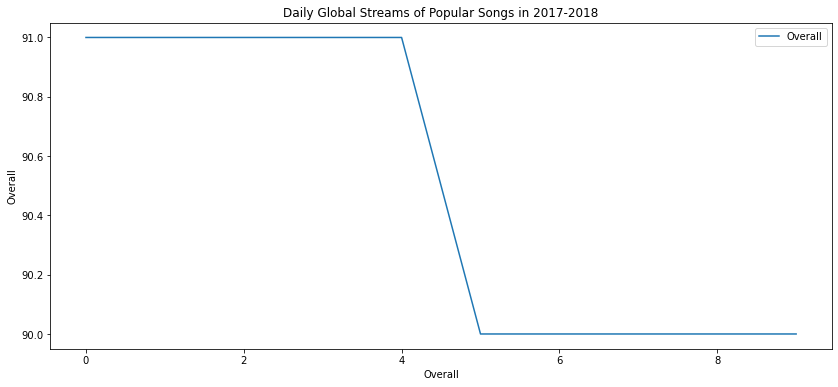

In [114]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=best_players['Overall'], label="Overall")

# Line chart showing daily global streams of 'Despacito'


# Add label for horizontal axis
plt.xlabel("Overall")

Text(0, 0.5, 'Arrival delay (in minutes)')

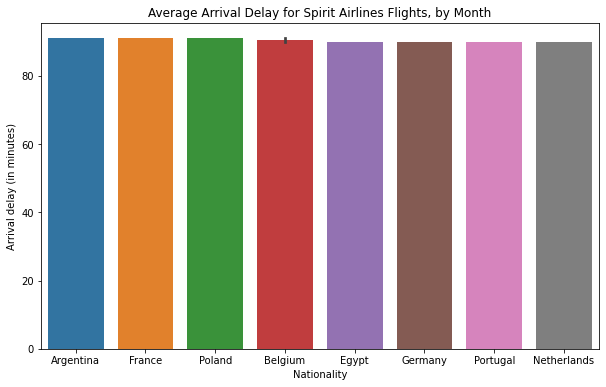

In [117]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=best_players["Overall"], x=best_players['Nationality'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Text(0.5, 1.0, 'Average Score for Racing Games, by Platform')

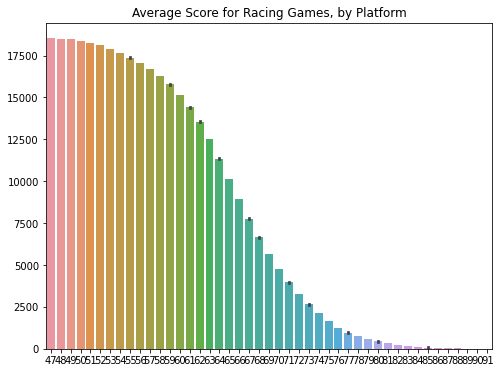

In [111]:
# Set the width and height of the figure
plt.figure(figsize=(8, 6))
# Bar chart showing average score for racing games by platform
sns.barplot(x=players_fifa23['Overall'], y=players_fifa23.index)
# Add label for horizontal axis
plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Racing Games, by Platform") # Your code here

In [ ]:
#Create our bar chart as before
plt.bar(x=np.arange(1,21),height=table['Overall'])

#Give it a title
plt.title("Premier League 16/17")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(1,21), table['Team'], rotation=90)

#Give the x and y axes a title
plt.xlabel("Team")
plt.ylabel("Points")

#Finally, show me our new plot
plt.show()